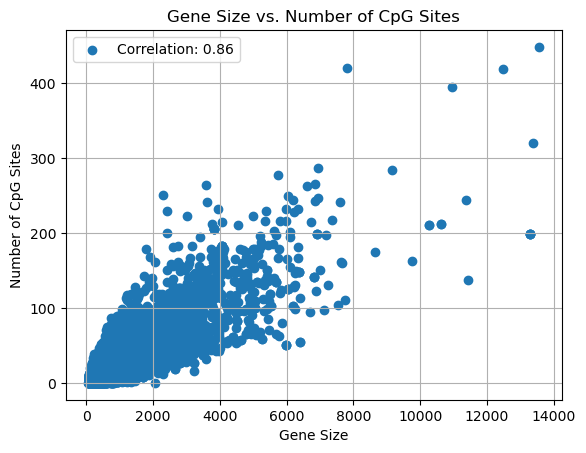

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pickle
data = pickle.load(open("gene_CpG_test_all.p", "rb"))

# Extract gene size and CpG count into separate lists
gene_size = np.array([item[1] for item in data])
cpg_count = np.array([item[0] for item in data])
sample = [item[2] for item in data]
gene_id = [item[3] for item in data]
CpG_OE = [item[4] for item in data]
# Calculate the correlation coefficient
correlation = np.corrcoef(gene_size, cpg_count)[0, 1]

# Create a scatter plot with lines connecting the points
plt.scatter(gene_size, cpg_count, label=f'Correlation: {correlation:.2f}')
plt.xlabel('Gene Size')
plt.ylabel('Number of CpG Sites')
plt.title('Gene Size vs. Number of CpG Sites')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/diptest/consts.py:84: UserWarning: Sample size exceeds the maximum limit of 72000. Results may not be accurate with precomputed statistical values.
  warnings.warn(


Dip Test Statistic: 0.0006934700920863773
Dip Test P-Value: 0.9902479520823146


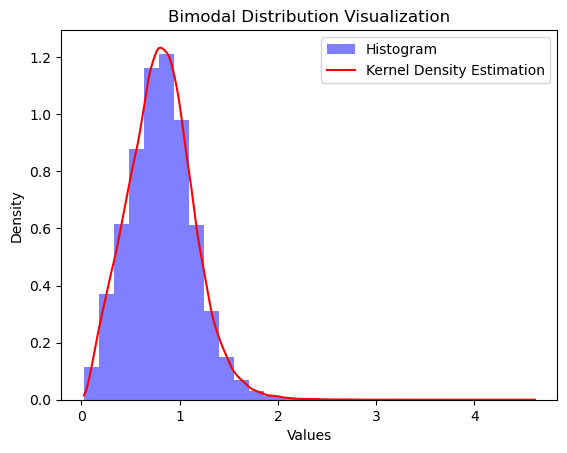

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from diptest import diptest

# Assuming you have already defined your list (replace this with your actual list)
my_list = np.array([el for el in CpG_OE if el])

# Visual inspection: Histogram and KDE plot
fig, ax = plt.subplots()
ax.hist(my_list, bins=30, density=True, alpha=0.5, color='blue', label='Histogram')

# Kernel Density Estimation
kde = gaussian_kde(my_list)
x_vals = np.linspace(min(my_list), max(my_list), 1000)
ax.plot(x_vals, kde(x_vals), 'r-', label='Kernel Density Estimation')

ax.set_title('Bimodal Distribution Visualization')
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.legend()

# Statistical testing: Hartigan's Dip Test
dip_test_statistic, dip_test_p_value = diptest(my_list)
print(f'Dip Test Statistic: {dip_test_statistic}')
print(f'Dip Test P-Value: {dip_test_p_value}')

plt.show()



In [17]:
import diptest, random
# Calculate the dip statistic and p-value
random.shuffle(valid)
stat, pval = diptest.diptest(np.array(valid[0:50000]))

# Print the results
print("Dip statistic =", stat)
print("P-value =", pval)

Dip statistic = 0.0007633333333333622
P-value = 1.0


In [28]:
# generate some bimodal random draws
N = 1000
hN = N // 2
x = np.empty(N, dtype=np.float64)
x[:hN] = np.random.normal(0.4, 1.0, hN)
x[hN:] = np.random.normal(-0.4, 1.0, hN)

# only the dip statistic
dip = diptest.dipstat(np.array(valid[0:10000]))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(valid[0:10000]))

/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


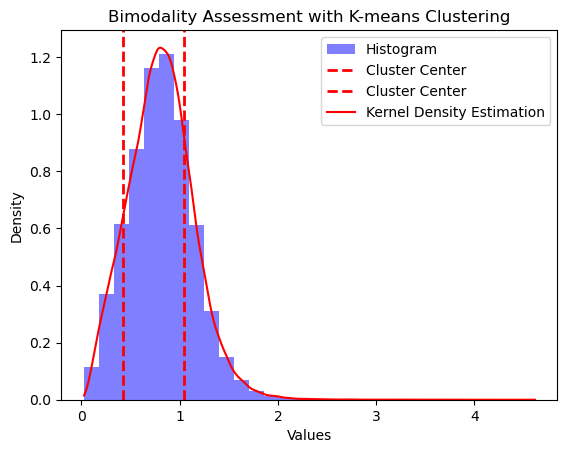

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
import pickle
# Assuming you have already defined your list (replace this with your actual list)

# Convert the list to a numpy array
#data = np.array(my_list).reshape(-1, 1)
dataset = pickle.load(open("dataset_bi.p", "rb"))
data = np.array([el[0] for el in dataset if el[1] == 0] + [el[0] for el in dataset if el[1] == 1]).reshape(-1, 1)
# Use K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Visual inspection: Histogram and KDE plot
fig, ax = plt.subplots()
ax.hist(my_list, bins=30, density=True, alpha=0.5, color='blue', label='Histogram')

# Plot cluster centers
for center in kmeans.cluster_centers_:
    ax.axvline(center[0], color='red', linestyle='--', linewidth=2, label='Cluster Center')

# Kernel Density Estimation
kde = gaussian_kde(my_list)
x_vals = np.linspace(min(my_list), max(my_list), 1000)
ax.plot(x_vals, kde(x_vals), 'r-', label='Kernel Density Estimation')

ax.set_title('Bimodality Assessment with K-means Clustering')
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.legend()

plt.show()


5620 1698


(array([ 33.,  81.,  78., 107., 110., 124., 117., 122., 130., 137., 116.,
        114., 127., 102.,  84., 116.,  95.,  93.,  93., 110., 132., 164.,
        231., 270., 300., 338., 313., 233., 178., 140., 112.,  61.,  42.,
         31.,  18.,  13.,   8.,   6.,   6.,   4.,   2.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   2.]),
 array([0.0401126 , 0.07988177, 0.11965095, 0.15942013, 0.1991893 ,
        0.23895848, 0.27872766, 0.31849683, 0.35826601, 0.39803519,
        0.43780436, 0.47757354, 0.51734272, 0.55711189, 0.59688107,
        0.63665025, 0.67641942, 0.7161886 , 0.75595778, 0.79572695,
        0.83549613, 0.87526531, 0.91503448, 0.95480366, 0.99457284,
        1.03434201, 1.07411119, 1.11388037, 1.15364954, 1.19341872,
        1.2331879 , 1.27295707, 1.31272625, 1.35249543, 1.3922646 ,
        1.43203378, 1.47180296, 1.51157213, 1.55134131, 1.59111049,
        1.63087966, 1.67064884, 1.71041802, 1.75018719, 1.78995637,
        1.82972555, 1.86949472, 1.9092639 , 1.

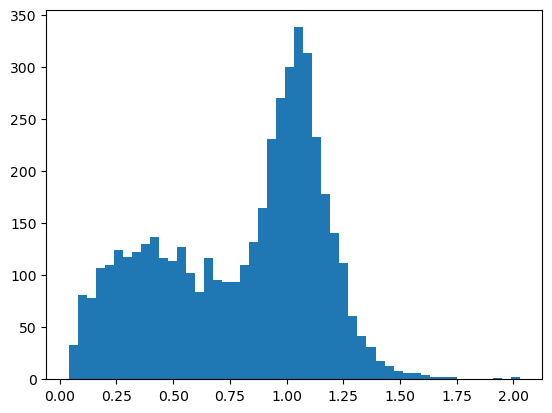

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import random
from numpy import hstack

# Your list of floating point numbers (replace this with your actual list)
dataset = pickle.load(open("dataset_bi.p", "rb"))
samp_1 = [el[0] for el in dataset if el[1] == 0] 
samp_2 = [el[0] for el in dataset if el[1] == 1]
print (len(samp_1), len(samp_2))
for el in [samp_1, samp_2]:
    random.shuffle(el)
sample = hstack((samp_1[0:3000], samp_2))
plt.hist(sample, bins=50)



Begin kernel density estimation demo 

Source data points (normal): 
[0.92368693 0.89899909 0.48641588 ... 0.84960323 1.07622378 0.87967914]

Generating estimated PDF function from source x_data 

Feeding points to KDE estimated PDF: 


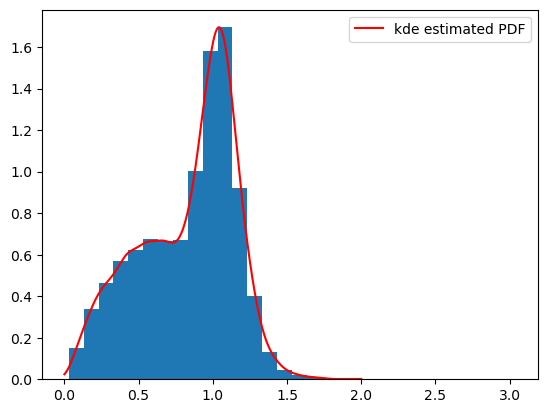


End demo 


In [98]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print("\nBegin kernel density estimation demo ")

np.random.seed(0)
#dataset = pickle.load(open("dataset_bi.p", "rb"))
dataset = pickle.load(open("dataset_mixed.p", "rb"))
#samp_1 = [el[0] for el in dataset if el[1] == 0] 
#samp_2 = [el[0] for el in dataset if el[1] == 1]
#random.shuffle(samp_1)
#random.shuffle(samp_2)
#sample = samp_1[0:2000] + samp_2
#sample = [el[0] for el in dataset]
#random.shuffle(sample)
random.shuffle(dataset)
sample = dataset
x_data = np.array(sample)
print("\nSource data points (normal): ")
print(x_data)

print("\nGenerating estimated PDF function from source x_data ")
gkde_obj = stats.gaussian_kde(x_data)

x_pts = np.linspace(0, +2, 500)
print("\nFeeding points to KDE estimated PDF: ")
estimated_pdf = gkde_obj.evaluate(x_pts)

# print("\nEstimated y data points from KDE: ")
# print(estimated_pdf)

y_normal = stats.norm.pdf(x_pts)

plt.figure()
plt.hist(x_data, bins=30, density=3.0)
plt.plot(x_pts, estimated_pdf, label="kde estimated PDF", \
 color="r")
plt.legend()
plt.show()

print("\nEnd demo ")

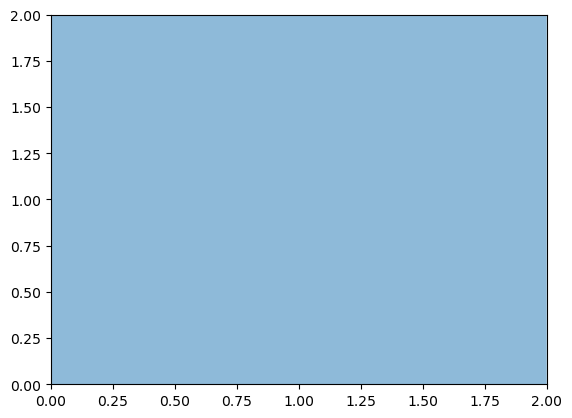

In [96]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a dataset x (replace this with your actual dataset)
x = x_data

# Define the range of x values for density evaluation
x_d = np.linspace(0, 2, 1000)

# Compute the density at each x_d point as the sum of PDFs of normal distributions centered at each x in the dataset
density = sum(norm(xi).pdf(x_d) for xi in x)

# Plot the filled area under the density curve
plt.fill_between(x_d, density, alpha=0.5)

# Plot vertical lines at each data point in the dataset
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

# Set axis limits
plt.axis([0, 2, 0, 2])

# Show the plot
plt.show()